<a href="https://colab.research.google.com/github/Pramodgopinathan/DeepLearning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acitivation Function

### Question 1

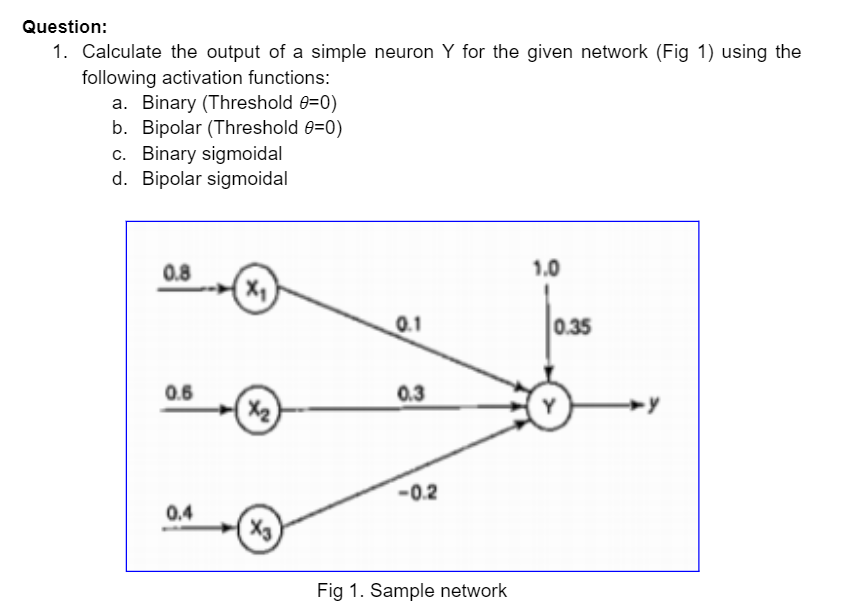






In [1]:
# we have two parameter one is to identify y or z which is 

# y = (x1 * W1 ) + (x2 * W2) + (x3 * w3) + baise
# n = 3 (as because there are three input nerons givens)

import numpy as np

# Above example x [0.8, 0.6, 0.4], w [0.1,0.3,-0.2] and baise = 0.35

X = np.array([0.8,0.6,0.4])
W = np.array([0.1,0.3,-0.2])
baise = 0.35

print('--------------------------------------------------------------------------------------------') 
print('------------------------Finding Y output ---------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
Y = np.dot(X,W) + baise 
print('The input of a simple neuron Y for the given network is:' , X)
print('The weight of a simple neuron Y for the given network is:' , W)
print('The output of a simple neuron Y for the given network is:' , Y)

# Define in the problem statement 
theta = 0 

def binary_step(y):
      if y < theta:
            return theta
      else:
            return 1

# Define in the problem statement 
theta = 0 

def bipolar_step(y):
      if y < theta:
            return theta
      else:
            return -1

def sigmoid_binary(x):
      return 1/(1 + np.exp(-x))

def sigmoid_bipolar(x):
      return (np.exp(x)-1)/(np.exp(x)+1)

# Activation function = f(Y) 
print('--------------------------------------------------------------------------------------------') 
print('------------------------Activitation Function-----------------------------------------------')
print('--------------------------------------------------------------------------------------------')
binary_step = binary_step(Y)
bipolar_step = bipolar_step(Y)
print('The output of a Y is 0.53 and after coverging with binary step activition function result is:' , binary_step) 
print('The output of a Y is 0.53 and after coverging with bipolar step activition function result is:' , bipolar_step) 
print('The output of a Y is 0.53 and after coverging with sigmoid binary activition function result is:' , sigmoid_binary(Y)) 
print('The output of a Y is 0.53 and after coverging with sigmoid bipolar activition function result is:' , sigmoid_bipolar(Y)) 

--------------------------------------------------------------------------------------------
------------------------Finding Y output ---------------------------------------------------
--------------------------------------------------------------------------------------------
The input of a simple neuron Y for the given network is: [0.8 0.6 0.4]
The weight of a simple neuron Y for the given network is: [ 0.1  0.3 -0.2]
The output of a simple neuron Y for the given network is: 0.53
--------------------------------------------------------------------------------------------
------------------------Activitation Function-----------------------------------------------
--------------------------------------------------------------------------------------------
The output of a Y is 0.53 and after coverging with binary step activition function result is: 1
The output of a Y is 0.53 and after coverging with bipolar step activition function result is: -1
The output of a Y is 0.53 and after cov

### Question 2

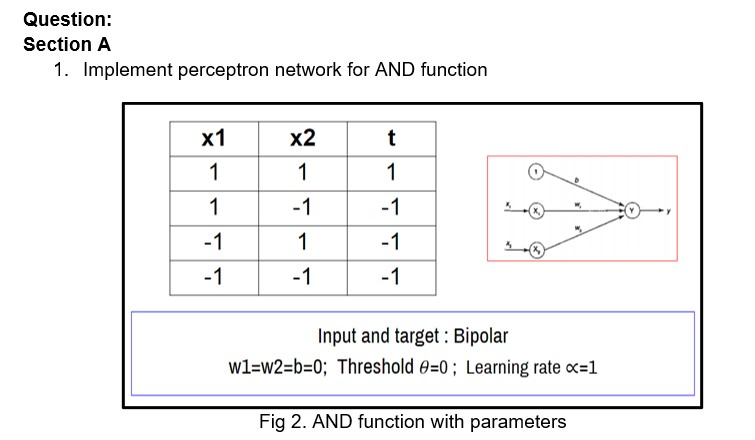

In [2]:
# for the first input pattern x1 = 1, x2 = 1 and t = 1 with weight and bias w1 = 0, w2 = 0 and b = 0
import numpy as np
#1. Calculate the net input 
def netinput(x1, x2, weight1, weight2, bias):
      Yin = bias + x1*weight1 + x2*weight2
      return Yin

#2. The output y is computed by applying activiations over the net input calculated
def activitionfun(Yin):
      if Yin > 0:
            return 1 
      elif Yin == 0:
            return 0
      else: 
            return -1 

#3. Check whether target is to f_Yin (calculated output of y)
def validation(x1,x2,weight1,weight2,bias, f_Yin, target,aplha):
      
      if target != f_Yin:
      # Change in the weights are: (alpha - learning rate is 1)
            weight1 = weight1 + aplha*target*x1
            weight2 = weight2 + aplha*target*x2
            bias = bias + aplha*target 
      return weight1,weight2,bias

row1 = np.array([[1],[1],[0],[0],[0]])

# Calculate the net input for row 1
Yin = netinput(row1[0][0],row1[1][0],row1[2][0],row1[3][0],row1[4][0])
row1 = np.append(row1,Yin)

# Calcuate the output y using activation function
Y = activitionfun(Yin)
row1 = np.append(row1,Y)

#adding target
target = 1
row1 = np.append(row1,target)

# Check any changes in weights and alpha given is 1 as learning rates
changes = validation(row1[0],row1[1],row1[2],row1[3],row1[4],row1[6],row1[7],1)
row1 = np.append(row1,changes)

import pandas as pd 
df = pd.DataFrame(row1).T

df.rename (columns = {0:'x1',1:'x2',2:'weight1',3:'weight2',4:'bias',5:'Yin (Net Input)'}, inplace=True)
df.rename (columns = {6:'Calculate Ouput (y)',7:'Target'}, inplace=True)
df.rename (columns = {8:'change_weight1',9:'change_weight2',10:'change_bias'}, inplace=True)
df



,x1,x2,weight1,weight2,bias,Yin (Net Input),Calculate Ouput (y),Target,change_weight1,change_weight2,change_bias
0,1,1,0,0,0,0,0,1,1,1,1


In [3]:
### Trying to get full data set again

import pandas as pd 
import matplotlib.pyplot as plt
import math as math
class ActivationFunctions:
    def __init__(self):
        pass
    @classmethod
    def binary(self, y, theta):

        if y >= theta:
            return 1
        return 0

    def bipolar_step(self, y, theta):

        if y >= theta:
            return 1
        return -1

    def binary_sigmoidal(self, y):

        return 1/(1+math.exp(-y))

    def bipolar_sigmoid(self, y):
        return math.tanh(y)

    def signum(self, y):
        if y<0:
            return -1
        elif y>0:
            return 1
        return 0

def AND_Perceptron(inputs,wt,tgt,epoch,learning_rate,bias,plot=False):
    rows = []
    X_cols = []
    w_cols = []
    ocols = ['bias','Y (Net input)','Calculated Output Y']
    for xi in range(0,inputs.shape[1]):
        X_cols.append(f"X{xi}")
        w_cols.append(f"wt{xi}")
    X_cols.append('Target')
    X_cols.extend(w_cols)
    X_cols.extend(ocols)
    cols=X_cols

    for epoch in range(0,epoch):
        for i in range(0,inputs.shape[0]):
            data = []

            yin = np.dot(inputs[i],wt) + bias
            yout = ActivationFunctions().signum(yin)

            data.extend(inputs[i])
            data.append(tgt[i])
            data.extend(wt)
            data.extend([bias,yin,yout])
            for j in range(0,inputs.shape[1]):
                #print(yout!=tgt[i])
                if yout != tgt[i]:
                    wt[j] = wt[j] + learning_rate*tgt[i]*inputs[i][j]
                    #print(f"W{j}", wt[j])
                    if j+1 == inputs.shape[1]:
                        bias = bias + tgt[i]
                        #print("B",bias)
            rows.append(data)
    #print(rows)
    df = pd.DataFrame(rows, columns=cols)
    
    return df

inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([0,0])
t = np.array([1,-1,-1,-1])
df = AND_Perceptron(inputs=inputs,wt=w,tgt=t,epoch=2,learning_rate=1,bias=0,plot=True)


df

,X0,X1,Target,wt0,wt1,bias,Y (Net input),Calculated Output Y
0,1,1,1,0,0,0,0,0
1,1,-1,-1,1,1,1,1,1
2,-1,1,-1,0,2,0,2,1
3,-1,-1,-1,1,1,-1,-3,-1
4,1,1,1,1,1,-1,1,1
5,1,-1,-1,1,1,-1,-1,-1
6,-1,1,-1,1,1,-1,-1,-1
7,-1,-1,-1,1,1,-1,-3,-1
